In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout, Layer
from tensorflow.keras import backend as K
from sklearn.metrics import classification_report


In [22]:
from google.colab import drive
drive.mount('/content/drive')
# Read data from Excel file into a DataFrame
data = pd.read_excel('/content/default of credit card clients.xls')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
#DRop a column
data=data.drop('Unnamed: 0',axis=1)
data.drop(0, inplace=True)
data.head()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [24]:
data = data.apply(pd.to_numeric, errors='coerce')

In [25]:
# Separate features and target variable
X = data.drop(columns=['Y']).values
y = data['Y'].values


Logistic Regression

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have X and y variables ready

# Step 4: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 6: Create a Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)  # Increase max_iter to allow more iterations

# Step 7: Train the model on the training data
logreg_model.fit(X_train, y_train)

# Step 8: Make predictions on the test data
y_pred = logreg_model.predict(X_test)

# Calculate metrics
accuracy1 = accuracy_score(y_test, y_pred)
precision1 = precision_score(y_test, y_pred)
recall1 = recall_score(y_test, y_pred)
f11= f1_score(y_test, y_pred)

# Print the metrics
print("Accuracy: {:.2f}%".format(accuracy1 * 100))
print("Precision: {:.2f}".format(precision1))
print("Recall: {:.2f}".format(recall1))
print("F1-Score: {:.2f}".format(f11))


Accuracy: 80.97%
Precision: 0.69
Recall: 0.24
F1-Score: 0.35



Confusion Matrix:
[[4549  138]
 [1004  309]]
ROC AUC: 0.6029478889527856
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.69      0.24      0.35      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000



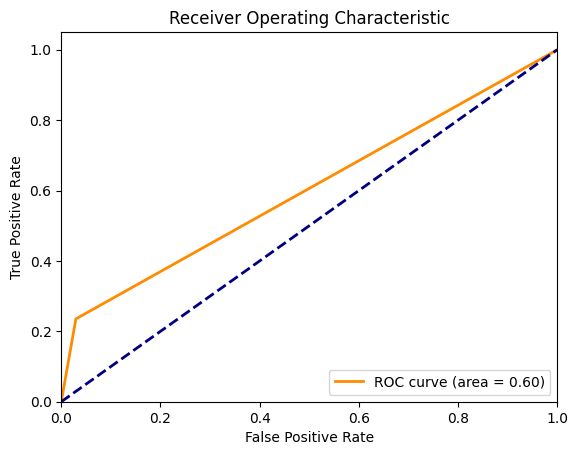

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt  # Import matplotlib
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# Calculate ROC curve
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred)
roc_auc_curve1 = roc_auc_score(y_test, y_pred)

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print ROC AUC
print("ROC AUC:", roc_auc_curve1)

# Print classification report
print(classification_report(y_test, y_pred))

# Plot ROC curve
plt.figure()
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_curve1))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


### Decision Tree

In [28]:
# Step 3: Split the data into features (X) and target variable (y)
X = data.drop('Y', axis=1)
y = data['Y']


In [29]:
# Step 4: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
from sklearn.ensemble import RandomForestClassifier
# Step 4: Train the Random Forest Model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.816
Accuracy: 81.60%
Precision: 0.64
Recall: 0.37
F1-Score: 0.47

Confusion Matrix:
[[4413  274]
 [ 830  483]]
ROC AUC: 0.6547001469443363
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.64      0.37      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



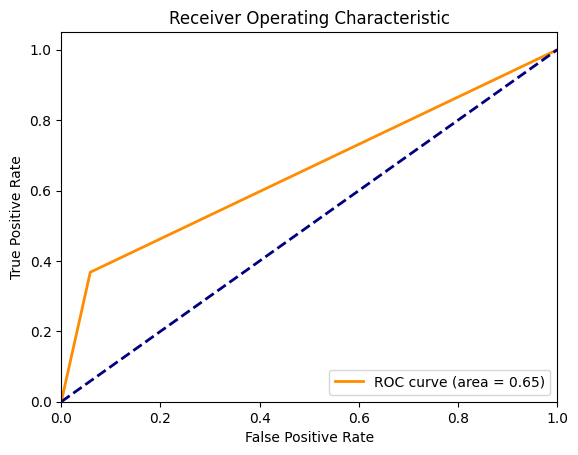

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


# Step 5: Model Evaluation
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Calculate metrics
accuracy2 = accuracy_score(y_test, y_pred)
precision2 = precision_score(y_test, y_pred)
recall2 = recall_score(y_test, y_pred)
f12 = f1_score(y_test, y_pred)

# Print the metrics
print("Accuracy: {:.2f}%".format(accuracy2 * 100))
print("Precision: {:.2f}".format(precision2))
print("Recall: {:.2f}".format(recall2))
print("F1-Score: {:.2f}".format(f12))

# Calculate ROC curve
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred)
roc_auc_curve2 = roc_auc_score(y_test, y_pred)

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))# Print ROC AUC
print("ROC AUC:", roc_auc)
# Print classification report
print(classification_report(y_test, y_pred))

# Plot ROC curve
plt.figure()
plt.plot(fpr2, tpr2, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_curve2))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


Support Vector Machine

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
# Create an SVM classifier
svm = SVC(kernel='linear', random_state=42)
# Train the classifier
svm.fit(X_train, y_train)
SVC(kernel='linear', random_state=42)
# Make predictions on the test set
y_pred = svm.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.8043333333333333
Accuracy: 80.43%
Precision: 0.59
Recall: 0.33
F1-Score: 0.43

Confusion Matrix:
[[4389  298]
 [ 876  437]]
ROC AUC: 0.6346227375195217
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4687
           1       0.59      0.33      0.43      1313

    accuracy                           0.80      6000
   macro avg       0.71      0.63      0.65      6000
weighted avg       0.78      0.80      0.78      6000



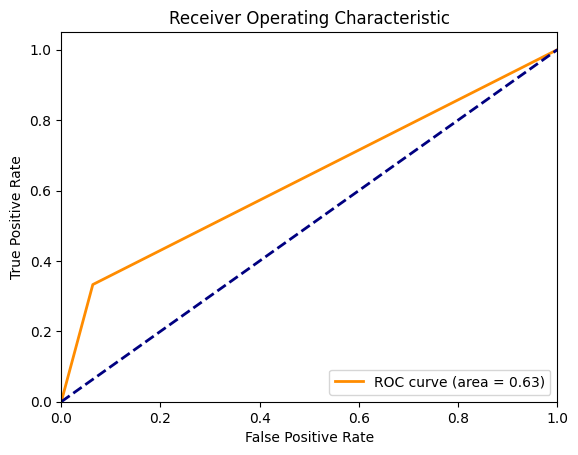

In [36]:
from sklearn.metrics import accuracy_score, roc_auc_score
# Step 5: Model Evaluation
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Calculate metrics
accuracy3 = accuracy_score(y_test, y_pred)
precision3 = precision_score(y_test, y_pred)
recall3 = recall_score(y_test, y_pred)
f13 = f1_score(y_test, y_pred)

# Print the metrics
print("Accuracy: {:.2f}%".format(accuracy3 * 100))
print("Precision: {:.2f}".format(precision3))
print("Recall: {:.2f}".format(recall3))
print("F1-Score: {:.2f}".format(f13))
# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("ROC AUC:", roc_auc)
print(classification_report(y_test, y_pred))


# Calculate ROC curve
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred)
roc_auc_curve3 = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr3, tpr3, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_curve3))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### **BIDIRECTIONAL LSTM**

In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout, Layer
from tensorflow.keras import backend as K
from sklearn.metrics import classification_report

In [38]:
# Step 1: Convert non-numeric columns to numeric format
data = data.apply(pd.to_numeric, errors='coerce')

In [39]:
# Separate features and target variable
X = data.drop(columns=['Y']).values
y = data['Y'].values

In [40]:
from sklearn.model_selection import StratifiedKFold
import numpy as np
from keras.layers import Layer
import keras.backend as K
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dropout, Dense
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif

# Define a custom Attention layer
class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1), initializer="normal")
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        e = K.tanh(K.dot(x, self.W))
        a = K.softmax(e, axis=1)
        output = x * a
        return K.sum(output, axis=1)

# Load or define your data (X, y)
# ...

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply feature selection using SelectKBest and ANOVA F-value
selector = SelectKBest(f_classif, k=10)  # Choose appropriate k
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Apply SMOTE to handle class imbalance on selected data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_selected, y_train)

# Reshape input for LSTM
X_train_smote = X_train_smote.reshape((X_train_smote.shape[0], X_train_smote.shape[1], 1))

# Define cross-validation using StratifiedKFold
n_splits = 5
kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store true positive rates and false positive rates for each fold
all_fpr = []
all_tpr = []

# Loop through cross-validation folds
for fold_idx, (train_index, val_index) in enumerate(kfold.split(X_train_smote, y_train_smote), 1):
    print(f"Training on fold {fold_idx}...")

    X_train_fold, X_val_fold = X_train_smote[train_index], X_train_smote[val_index]
    y_train_fold, y_val_fold = y_train_smote[train_index], y_train_smote[val_index]

    # Define and compile the model for each fold
    model = Sequential()
    model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(X_train_fold.shape[1], X_train_fold.shape[2])))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(64, return_sequences=True)))
    model.add(Dropout(0.2))
    model.add(AttentionLayer())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model on the current fold
    model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32, validation_data=(X_val_fold, y_val_fold))

    # Evaluate on the validation fold
    y_pred_val = model.predict(X_val_fold)
    y_pred_val_binary = (y_pred_val > 0.5).astype(int)  # Convert to binary predictions

    fpr, tpr, _ = roc_curve(y_val_fold, y_pred_val)
    all_fpr.append(fpr)
    all_tpr.append(tpr)

# Initialize lists to store metrics for each fold
all_cm = []
all_precision = []
all_recall = []
all_f1 = []

# Loop through cross-validation folds for metrics calculation
for fold_idx, (train_index, val_index) in enumerate(kfold.split(X_train_smote, y_train_smote), 1):
    X_train_fold, X_val_fold = X_train_smote[train_index], X_train_smote[val_index]
    y_train_fold, y_val_fold = y_train_smote[train_index], y_train_smote[val_index]

    # Evaluate on the validation fold
    y_pred_val = model.predict(X_val_fold)
    y_pred_val_binary = (y_pred_val > 0.5).astype(int)  # Convert to binary predictions

    # Calculate confusion matrix for the current fold
    cm = confusion_matrix(y_val_fold, y_pred_val_binary)
    all_cm.append(cm)

    # Calculate precision, recall, and F1-score for the current fold
    classification_rep_val = classification_report(y_val_fold, y_pred_val_binary, output_dict=True)
    precision = classification_rep_val['1']['precision']
    recall = classification_rep_val['1']['recall']
    f1 = classification_rep_val['1']['f1-score']
    all_precision.append(precision)
    all_recall.append(recall)
    all_f1.append(f1)

# Calculate and print average confusion matrix
average_cm = np.mean(all_cm, axis=0)
print("Average Confusion Matrix Across Folds:")
print(average_cm)

# Calculate and print average precision, recall, and F1-score
average_precision = np.mean(all_precision)
average_recall = np.mean(all_recall)
average_f1 = np.mean(all_f1)
print("Average Precision Across Folds:", average_precision)
print("Average Recall Across Folds:", average_recall)
print("Average F1-Score Across Folds:", average_f1)


Training on fold 1...
Epoch 1/100
934/934 [==============================] - 21s 13ms/step - loss: 0.6011 - accuracy: 0.6791 - val_loss: 0.5867 - val_accuracy: 0.6921
Epoch 2/100
934/934 [==============================] - 11s 12ms/step - loss: 0.5826 - accuracy: 0.6962 - val_loss: 0.5763 - val_accuracy: 0.7010
Epoch 3/100
934/934 [==============================] - 11s 12ms/step - loss: 0.5754 - accuracy: 0.7027 - val_loss: 0.5758 - val_accuracy: 0.7018
Epoch 4/100
934/934 [==============================] - 12s 13ms/step - loss: 0.5705 - accuracy: 0.7049 - val_loss: 0.5670 - val_accuracy: 0.7150
Epoch 5/100
934/934 [==============================] - 13s 14ms/step - loss: 0.5674 - accuracy: 0.7089 - val_loss: 0.5647 - val_accuracy: 0.7133
Epoch 6/100
934/934 [==============================] - 11s 12ms/step - loss: 0.5644 - accuracy: 0.7111 - val_loss: 0.5614 - val_accuracy: 0.7144
Epoch 7/100
934/934 [==============================] - 10s 11ms/step - loss: 0.5624 - accuracy: 0.7157 - val

In [41]:
# ... (Previous code up to the point of calculating average precision, recall, and F1-score)

# Calculate and print average accuracy
average_accuracy = np.mean([(cm[0, 0] + cm[1, 1]) / np.sum(cm) for cm in all_cm])
print("Average Accuracy Across Folds:", average_accuracy)


Average Accuracy Across Folds: 0.8607088184084215


In [42]:
# ... (Define and preprocess your training data as in your previous code) ...

# Load and fit the scaler on the training dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaling transformation to the test dataset
X_test_scaled = scaler.transform(X_test)  # Use the same scaler object

# Reshape the preprocessed test data for LSTM
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Make predictions on the test dataset
y_pred_test = model.predict(X_test_reshaped)
y_pred_test_binary = (y_pred_test > 0.5).astype(int)  # Convert to binary predictions

# Now you can use y_pred_test_binary for further analysis or evaluation
# For example, printing the binary predictions:
print("Binary Predictions on Test Dataset:")
print(y_pred_test_binary)


188/188 [==============================] - 2s 4ms/step
Binary Predictions on Test Dataset:
[[1]
 [1]
 [0]
 ...
 [0]
 [1]
 [0]]


In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_test_binary)
print("Accuracy on Test Dataset:", accuracy)
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_test_binary)
recall = recall_score(y_test, y_pred_test_binary)
f1 = f1_score(y_test, y_pred_test_binary)
print("Precision on Test Dataset:", precision)
print("Recall on Test Dataset:", recall)
print("F1-score on Test Dataset:", f1)
# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_test)
print("ROC AUC on Test Dataset:", roc_auc)


Accuracy on Test Dataset: 0.6673333333333333
Precision on Test Dataset: 0.2576295244854507
Recall on Test Dataset: 0.27646610814927647
F1-score on Test Dataset: 0.26671565025716387
ROC AUC on Test Dataset: 0.5566559544467684


In [44]:
model.save('/content/save_model.h5')

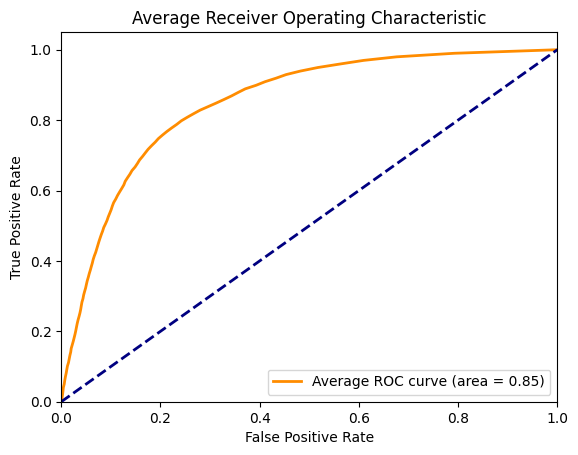

In [45]:
# Calculate average ROC curve and AUC
# Interpolate ROC curves to have the same number of thresholds
interp_tpr = np.linspace(0, 1, 100)
mean_fpr = np.mean([np.interp(interp_tpr, tpr, fpr) for fpr, tpr in zip(all_fpr, all_tpr)], axis=0)
mean_tpr = interp_tpr
roc_auc = auc(mean_fpr, mean_tpr)

# Plot the combined ROC curve
plt.figure()
plt.plot(mean_fpr, mean_tpr, color='darkorange', lw=2, label='Average ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Average Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

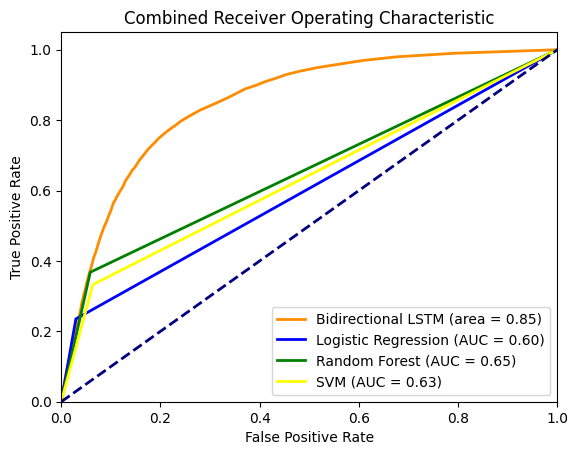

In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Plot combined ROC curve
plt.figure()
plt.plot(mean_fpr, mean_tpr, color='darkorange', lw=2, label='Bidirectional LSTM (area = %0.2f)' % roc_auc)
plt.plot(fpr1, tpr1, color='blue', lw=2, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_curve1))
plt.plot(fpr2, tpr2, color='green', lw=2, label='Random Forest (AUC = {:.2f})'.format(roc_auc_curve2))
plt.plot(fpr3, tpr3, color='yellow', lw=2, label='SVM (AUC = {:.2f})'.format(roc_auc_curve3))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Combined Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


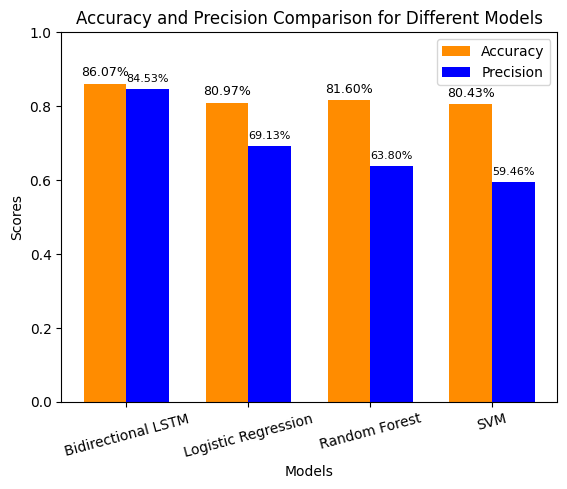

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



models = ['Logistic Regression', 'Random Forest', 'SVM']
accuracy_values = [accuracy1, accuracy2, accuracy3]
precision_values = [precision1, precision2, precision3]

# Include Bidirectional LSTM separately since you have the 'average_accuracy' for it
models.insert(0, 'Bidirectional LSTM')
accuracy_values.insert(0, average_accuracy)
precision_values.insert(0, average_precision)

bar_width = 0.35  # Width of the bars

fig, ax = plt.subplots()
index = np.arange(len(models))

# Draw bars for accuracy
bar1 = ax.bar(index, accuracy_values, bar_width, label='Accuracy', color='darkorange')

# Draw bars for precision
bar2 = ax.bar(index + bar_width, precision_values, bar_width, label='Precision', color='blue')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Accuracy and Precision Comparison for Different Models')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models, rotation=15)
ax.legend()

plt.ylim([0., 1])

# Adding accuracy and precision values as text on top of each bar
for i, (acc, prec) in enumerate(zip(accuracy_values, precision_values)):
    ax.text(i, acc + 0.02, f'{acc:.2%}', ha='center', color='black', fontsize=9)
    ax.text(i + bar_width, prec + 0.02, f'{prec:.2%}', ha='center', color='black', fontsize=8)

plt.show()


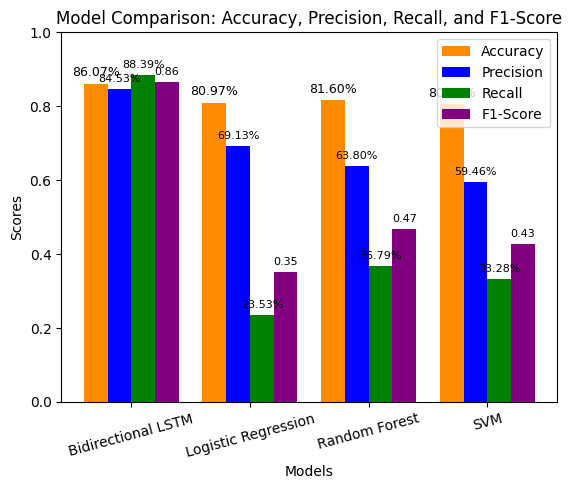

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example data (replace with your actual values)
models = ['Logistic Regression', 'Random Forest', 'SVM']
accuracy_values = [accuracy1, accuracy2, accuracy3]
precision_values = [precision1, precision2, precision3]
recall_values = [recall1, recall2, recall3]
f1_values = [f11, f12, f13]

# Include Bidirectional LSTM separately since you have the 'average_accuracy' for it
models.insert(0, 'Bidirectional LSTM')
accuracy_values.insert(0, average_accuracy)
precision_values.insert(0, average_precision)
recall_values.insert(0, average_recall)
f1_values.insert(0, average_f1)

bar_width = 0.2  # Width of the bars
index = np.arange(len(models))

fig, ax = plt.subplots()

# Draw bars for accuracy, precision, recall, and F1-score
bar1 = ax.bar(index, accuracy_values, bar_width, label='Accuracy', color='darkorange')
bar2 = ax.bar(index + bar_width, precision_values, bar_width, label='Precision', color='blue')
bar3 = ax.bar(index + 2 * bar_width, recall_values, bar_width, label='Recall', color='green')
bar4 = ax.bar(index + 3 * bar_width, f1_values, bar_width, label='F1-Score', color='purple')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison: Accuracy, Precision, Recall, and F1-Score')
ax.set_xticks(index + 1.5 * bar_width)
ax.set_xticklabels(models, rotation=15)
ax.legend()

plt.ylim([0., 1])

# Adding score values as text on top of each bar
for i, (acc, prec, rec, f1) in enumerate(zip(accuracy_values, precision_values, recall_values, f1_values)):
    ax.text(i, acc + 0.02, f'{acc:.2%}', ha='center', color='black', fontsize=9)
    ax.text(i + bar_width, prec + 0.02, f'{prec:.2%}', ha='center', color='black', fontsize=8)
    ax.text(i + 2 * bar_width, rec + 0.02, f'{rec:.2%}', ha='center', color='black', fontsize=8)
    ax.text(i + 3 * bar_width, f1 + 0.02, f'{f1:.2f}', ha='center', color='black', fontsize=8)

plt.show()
